In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

## Problem 2: Points to map (7 points)
 
The problem 2 this week continues the process that we started last week in Exercise 1, i.e. creating geometric point -objects and putting them into a map. 

**In this problem, our aim is to plot a map based on a set of longitude and latitude coordinates that are stored in a csv file.** 
The coordinates are in WGS84 decimal degrees, and the data is stored in `some_posts.csv` comma separated file in the folder `data`. First rows of the data look like this:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | userid |

*Note: although the data is based on real social media data, it is heavily anonymized. Userids and timestamps have been randomized, i.e. they do not not match with real ones, also spatial accuracy of the data have been lowered.*

**First:**

- Import the needed modules
- Read the data from `data/some_posts.csv` into a Pandas dataframe called `data`
- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns 

**HINTS:**

You want to create a Shapely point *on each row*, based on columns `'lon'` and `'lat'`. You can achieve this by using a `for`-loop and `.iterrows()` but this approach will be extremely slow! In stead, we recommend that you try one of these approaches:

- `zip` lon and lat columns and create the points using a for-loop (loop over the zipped object), OR
- use the [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) to apply the shapely Point constructor on each row. 
- more hints in the on the [course webpages](https://automating-gis-processes.github.io/site/lessons/L2/exercise-2.html).





In [11]:
data = pd.read_csv('data/some_posts.csv')

In [12]:
data['geometry'] = list(map(Point, data[['lon', 'lat']].values))

In [13]:
data

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.484633302 -24.980792492)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.508905612 -25.499224667)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.930866066 -24.342578456)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.519718439 -24.85461393)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.520835558 -24.921068894)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.354468659 -24.79954083)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.956033333 -25.467991667)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.997408647 -25.332223289)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00553607 -25.508851029)


In [14]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print("Number of rows:", len(data))

Number of rows: 81379


In [15]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(data['geometry'].head())

0    POINT (31.484633302 -24.980792492)
1    POINT (31.508905612 -25.499224667)
2    POINT (30.930866066 -24.342578456)
3     POINT (31.519718439 -24.85461393)
4    POINT (31.520835558 -24.921068894)
Name: geometry, dtype: object


**Next, save the result as a shapefile:**
- Convert that DataFrame into a GeoDataFrame called `geo`, [See hints](https://automating-gis-processes.github.io/site/lessons/L2/exercise-2.html)

- Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326) **in the WKT format**

- Save output to file: `Kruger_posts.shp`



In [31]:
geo = gpd.GeoDataFrame(data)
geo.crs = CRS.from_epsg(4326).to_wkt()

In [35]:
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
fp = 'Kruger_posts.shp'
geo.to_file(fp)

In [37]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print("Number of rows:", len(geo))
print(geo.head())

Number of rows: 81379
         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                     geometry  
0  POINT (31.48463 -24.98079)  
1  POINT (31.50891 -25.49922)  
2  POINT (30.93087 -24.34258)  
3  POINT (31.51972 -24.85461)  
4  POINT (31.52084 -24.92107)  


In [38]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import os
assert os.path.isfile(fp), "output shapefile does not exist"

**Finally:** 
- **Create a simple map of the points** using the `geodataframe.plot()` -funtion. You might need to use the `matplotlib pyplot` `show()` method to display the image within this notebook. 

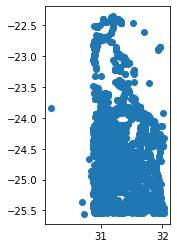

In [40]:
geo.plot();

- *Optional:* Download the output shapefile and create a map in a gis-software (for example, overlay the points with a basemap). If you do this, remember to upload the  map as a png image to this repository and add link to the image file to this notebook:

YOUR ANSWER HERE

Well done! Now you can move on to [Exercise-2-problem-3.ipynb](Exercise-2-problem-3.ipynb)